# Assignment 1 - *Implementing Backpropagation*


> **Team members**

*   Jannik Wirtz - i6292051 - jannik.wirtz@student.maastrichtuniversity.nl
*   Shyngyskhan Abilkassov - i6288304 - s.abilkassov@student.maastrichtuniversity.nl

## Imports and helper functions


In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [9]:
"""
  categorical data
  function that generates one hot endo
"""
def generate_data():
  X = []
  for i in range(8):
    temp_x = [0]*8
    temp_x[i] = 1
    X.append(temp_x)

  return np.asarray(X)

"""
  sigmoid activation function
"""
def sigmoid(z):
    a = 1 / (1 + np.exp(-z))
    return a

## Autoencoder class

In [10]:
class AutoEncoder:
  def __init__(self, X):
    # store batch input and output locally
    # to reduce number of parameter passes
    self.X = X
    self.Y = X
    # NN layer dimensions
    self.inputUnits = 8
    self.hiddenUnits = 3
    self.outputUnits = 8
    # initialize NN weights
    self.theta1 = self.initializeWeights(self.hiddenUnits, self.inputUnits+1)
    self.theta2 = self.initializeWeights(self.outputUnits, self.hiddenUnits+1)

  """
    a method that declares NN weight matrices and
    initializes them to random values in a specified range
  """
  def initializeWeights(self, rows, cols):
    theta = []
    for i in range(rows):
      temp_theta = []
      for i in range(cols):
        value = random.uniform(-0.02, 0.02)
        temp_theta.append(value)
      theta.append(temp_theta)
    return np.asarray(theta)

  """
    a method that gets the input, adds biases,
    multiplies it by the weight matrix, and applies
    the activation function
  """
  def forwardPass(self, input, theta):
    input = np.insert(input, 0, 1, axis=1)
    z = np.dot(input, theta.T)
    a = sigmoid(z)
    return a

  """
    a method that takes the input X and returns the
    NN output
  """
  def feedForward(self, X):
    self.a1 = X
    self.a2 = AE.forwardPass(self.a1, self.theta1)
    self.a3 = AE.forwardPass(self.a2, self.theta2)
    return self.a3



In [11]:
class BatchGradientDescent:

  def __init__(self, model, learningRate, lamda):
    self.history = []
    self.model = model
    self.lam = lamda # lambda for regularization strength
    self.lr = learningRate

  """
    backpropogates the error/delta
    through the layers of the network and their individual weights
  """
  def computeDeltas(self, X):
    self.model.feedForward(X)
    Y = X
    # 8x8 * 8x8 = 8x8
    self.delta3 = np.multiply(self.model.a3 - Y,
                              np.dot(self.model.a3, 1 - self.model.a3))
    # 8x3 * 8x3 = 8x3
    self.delta2 = np.multiply(np.dot(self.delta3, self.model.theta2)[:,1:],
                              np.multiply(self.model.a2, 1 - self.model.a2))

  """
    one-half squared error
  """
  def costFunction(self, h, y):
    return np.average(np.multiply(np.square(np.subtract(h,y)), 0.5))

  """
    performs a single gradient descent step
    simultaneously updating the models weights & biases
    of each respective layer
    - stepsize is determined by the learning rate
    - weight decay is added to the weight updates
  """
  def updateWeights(self, X):
    self.computeDeltas(X)

    # updating weights
    self.model.theta1[:,1:] = self.model.theta1[:,1:] - self.lr/X.shape[0] * (self.delta2.T @ self.model.a1) + self.lam * self.model.theta1[:,1:]
    self.model.theta2[:,1:] = self.model.theta2[:,1:] - self.lr/X.shape[0] * (self.delta3.T @ self.model.a2) + self.lam * self.model.theta2[:,1:]

    # update biases
    self.model.theta1[:,:1] = self.model.theta1[:,:1] - self.lr/X.shape[0] * np.expand_dims(np.average(self.delta2, axis=0), axis=1)
    self.model.theta2[:,:1] = self.model.theta2[:,:1] - self.lr/X.shape[0] * np.expand_dims(np.average(self.delta3, axis=0), axis=1)


  """
    trains the network for a specified number of epochs
    - reports the achieved average error on all 8 examples after each epoch
    - records a history for graphing of learning curves
  """
  def trainModel(self, X, epochs=200):
    for i in range(epochs):
      self.updateWeights(X)
      self.model.feedForward(X)
      print('Epoch=%d: Error=%f' % (i+1, self.costFunction(self.model.a3, X)))
      self.history.append((len(self.history)+1,
                           self.costFunction(self.model.a3, X)))



Epoch=1: Error=0.062328
Epoch=2: Error=0.062312
Epoch=3: Error=0.062295
Epoch=4: Error=0.062274
Epoch=5: Error=0.062248
Epoch=6: Error=0.062217
Epoch=7: Error=0.062178
Epoch=8: Error=0.062128
Epoch=9: Error=0.062062
Epoch=10: Error=0.061973
Epoch=11: Error=0.061848
Epoch=12: Error=0.061662
Epoch=13: Error=0.061373
Epoch=14: Error=0.060894
Epoch=15: Error=0.060056
Epoch=16: Error=0.058598
Epoch=17: Error=0.056534
Epoch=18: Error=0.055022
Epoch=19: Error=0.054703
Epoch=20: Error=0.054687
Epoch=21: Error=0.054687
Epoch=22: Error=0.054687
Epoch=23: Error=0.054686
Epoch=24: Error=0.054686
Epoch=25: Error=0.054685
Epoch=26: Error=0.054685
Epoch=27: Error=0.054684
Epoch=28: Error=0.054684
Epoch=29: Error=0.054683
Epoch=30: Error=0.054681
Epoch=31: Error=0.054680
Epoch=32: Error=0.054678
Epoch=33: Error=0.054676
Epoch=34: Error=0.054673
Epoch=35: Error=0.054670
Epoch=36: Error=0.054666
Epoch=37: Error=0.054660
Epoch=38: Error=0.054654
Epoch=39: Error=0.054646
Epoch=40: Error=0.054636
Epoch=41:

No handles with labels found to put in legend.


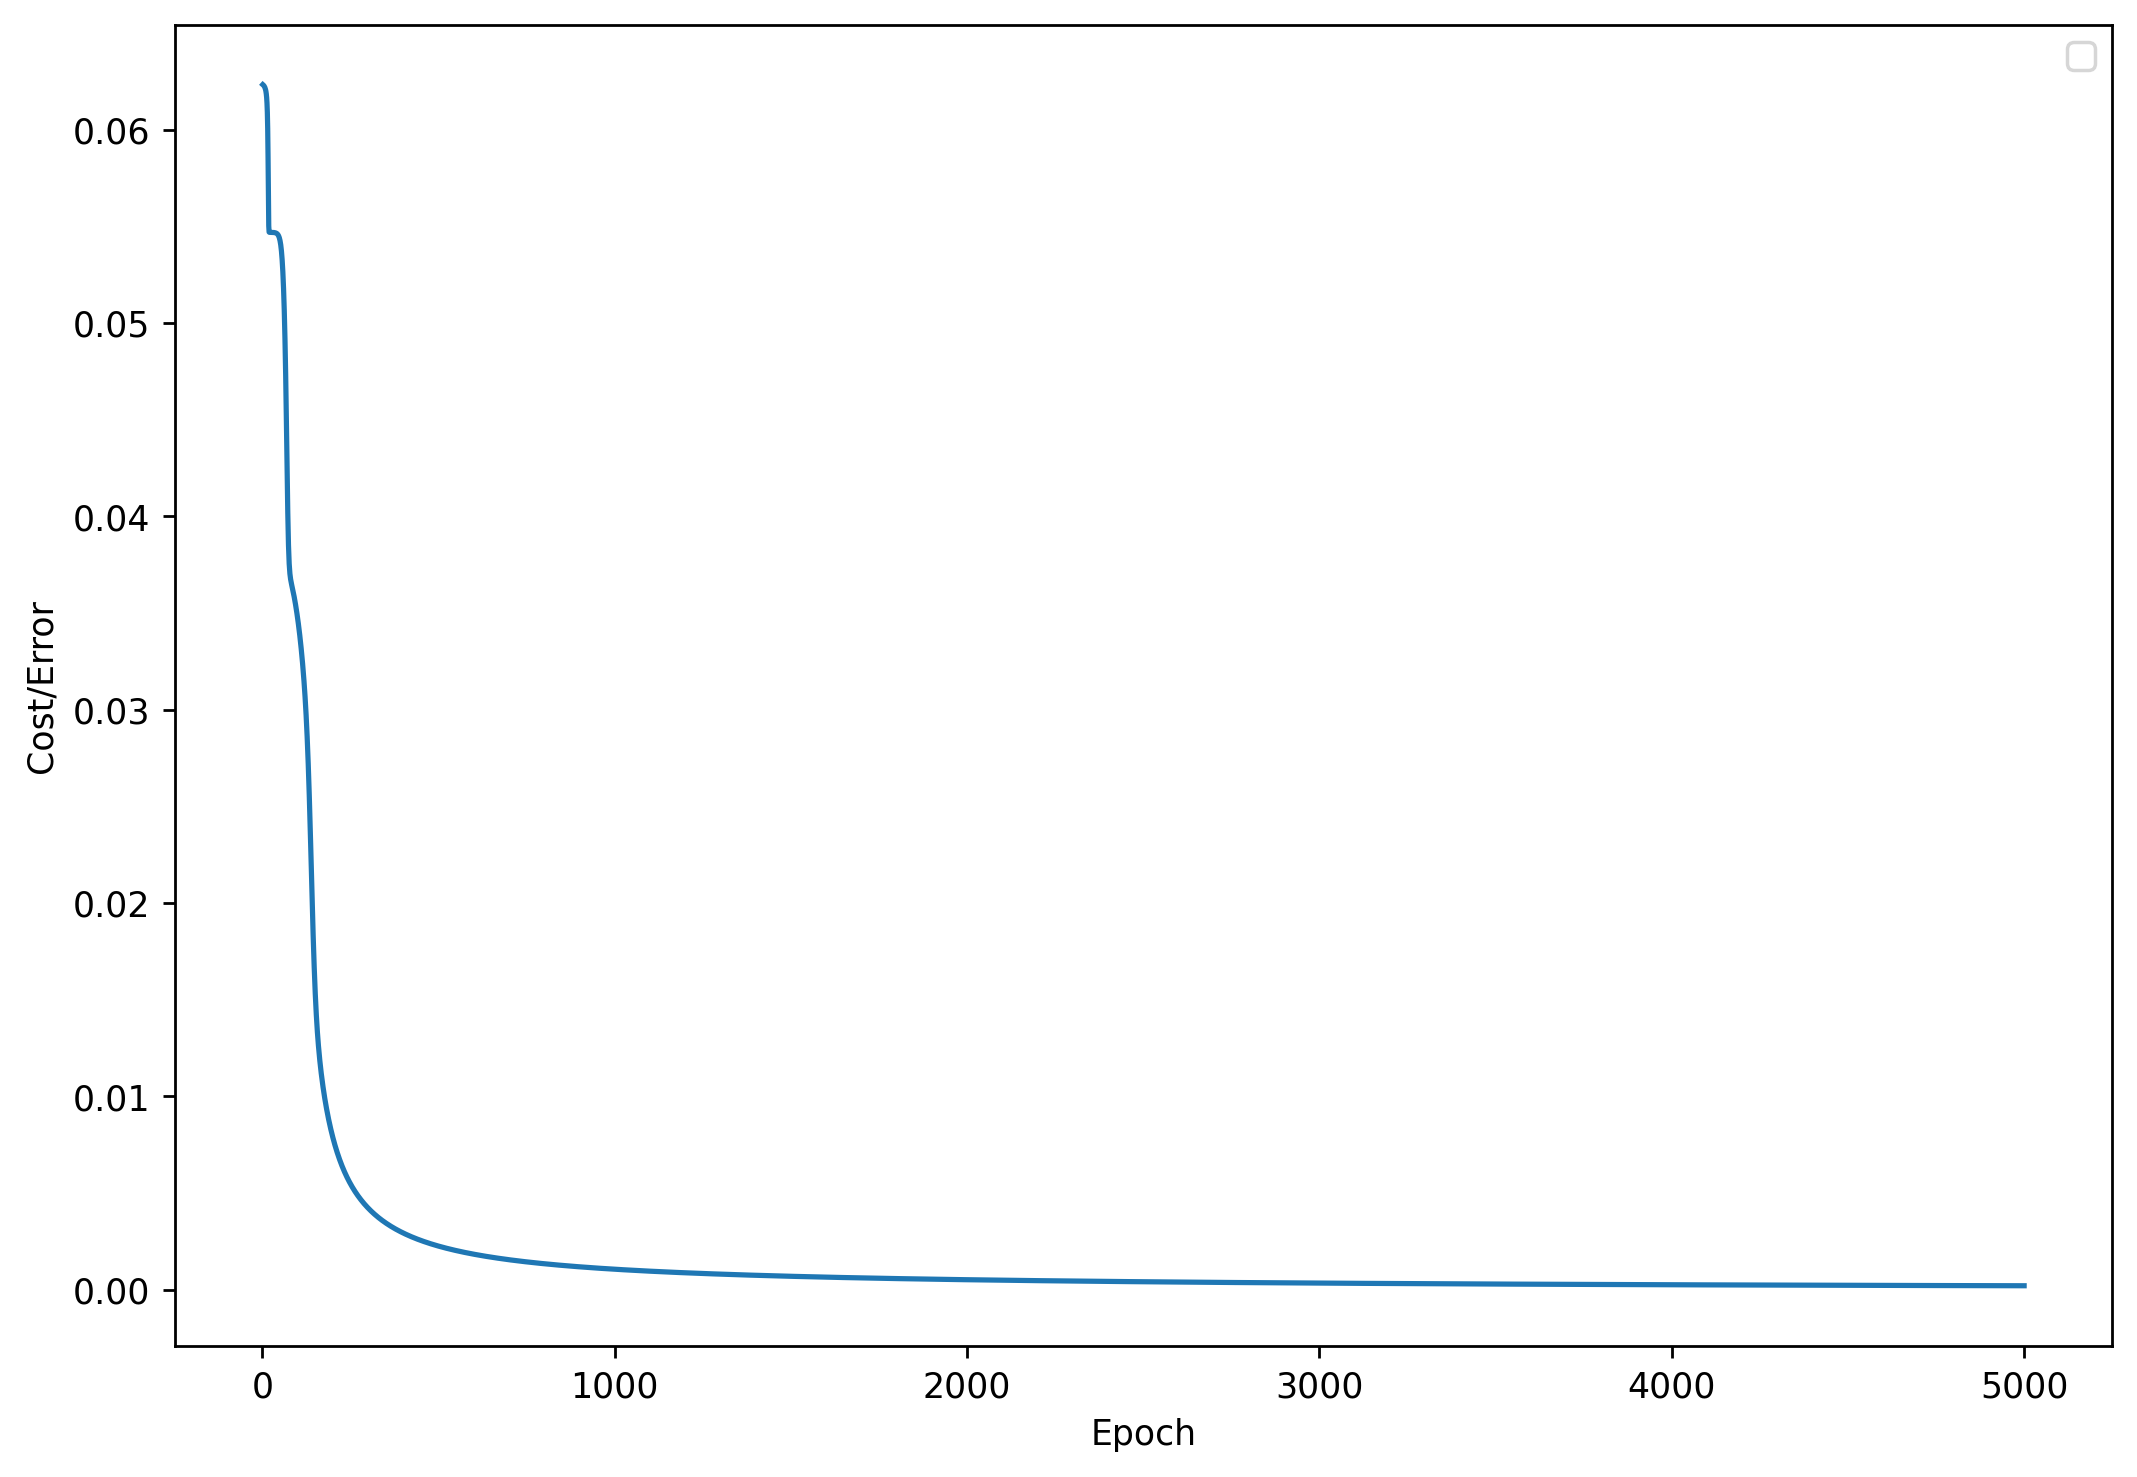

In [12]:
# load data
X = generate_data()
Y = X

# create model (AE) and optimizer (BGD)
AE = AutoEncoder(X)
BGD = BatchGradientDescent(AE, 10, 0)

BGD.trainModel(X, 5000)
predictions = BGD.model.feedForward(X)
print(predictions)
for i in range(8):
  print('Predicted:', np.argmax(predictions[i])+1)
  print('Expected: ', i+1)

history = np.array(BGD.history)
plt.plot(history[:,0],history[:,1])
plt.xlabel("Epoch")
plt.ylabel("Cost/Error")
plt.legend()
plt.show()

Epoch=1: Error=0.118916
Epoch=2: Error=0.113450
Epoch=3: Error=0.108466
Epoch=4: Error=0.103927
Epoch=5: Error=0.099797
Epoch=6: Error=0.096040
Epoch=7: Error=0.092624
Epoch=8: Error=0.089519
Epoch=9: Error=0.086696
Epoch=10: Error=0.084130
Epoch=11: Error=0.081795
Epoch=12: Error=0.079671
Epoch=13: Error=0.077737
Epoch=14: Error=0.075976
Epoch=15: Error=0.074370
Epoch=16: Error=0.072905
Epoch=17: Error=0.071568
Epoch=18: Error=0.070346
Epoch=19: Error=0.069227
Epoch=20: Error=0.068204
Epoch=21: Error=0.067265
Epoch=22: Error=0.066404
Epoch=23: Error=0.065613
Epoch=24: Error=0.064886
Epoch=25: Error=0.064216
Epoch=26: Error=0.063599
Epoch=27: Error=0.063030
Epoch=28: Error=0.062504
Epoch=29: Error=0.062019
Epoch=30: Error=0.061569
Epoch=31: Error=0.061152
Epoch=32: Error=0.060766
Epoch=33: Error=0.060407
Epoch=34: Error=0.060074
Epoch=35: Error=0.059764
Epoch=36: Error=0.059476
Epoch=37: Error=0.059207
Epoch=38: Error=0.058956
Epoch=39: Error=0.058722
Epoch=40: Error=0.058503
Epoch=41:

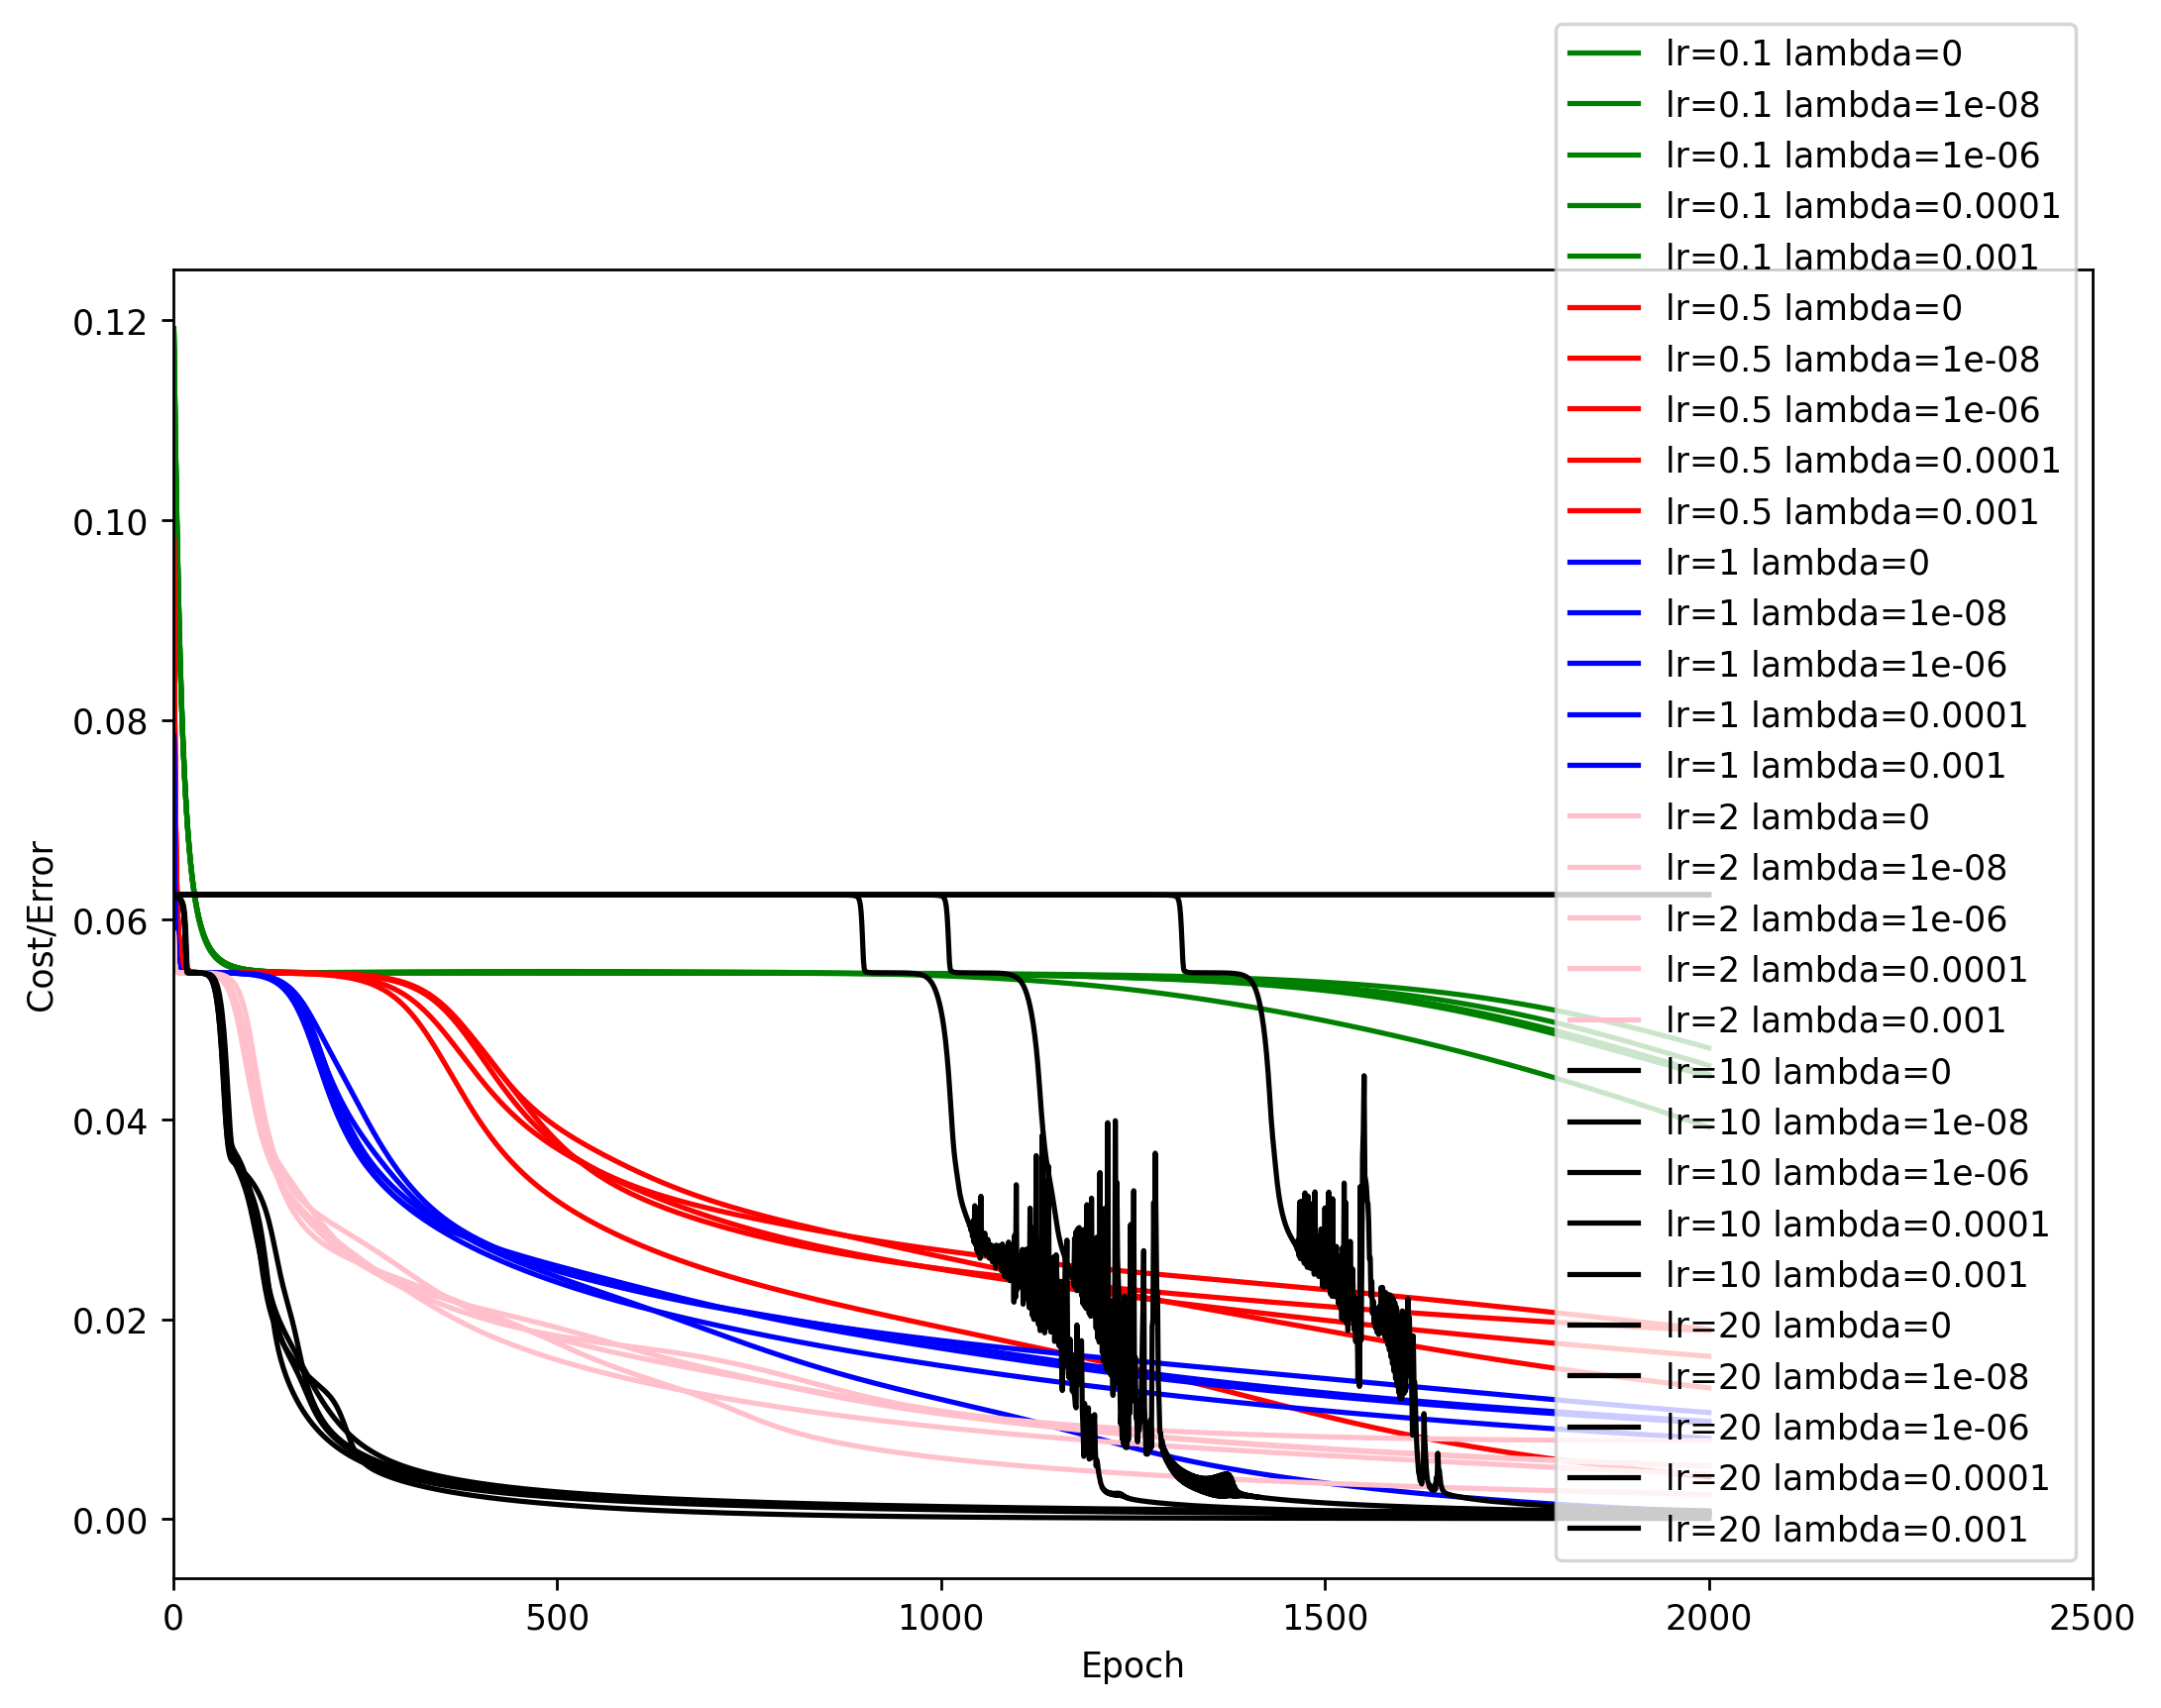

In [13]:
# Experiments
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.dpi'] = 250

# Gridsearch
epochs = 2000
regularization = [0, 1e-8, 1e-6, 1e-4, 1e-3]
learningRates = [0.1, 0.5, 1, 2, 10, 20]
P = np.zeros(shape=(len(regularization),len(learningRates))) # for heatmap of gridsearch

# load data
X = generate_data()

for i, lr in enumerate(learningRates):
  for j, reg in enumerate(regularization):
    AE = AutoEncoder(X)
    BGD = BatchGradientDescent(AE, lr, reg)
    BGD.trainModel(X, epochs)
    history = np.array(BGD.history)
    if lr == 0.1:
      plt.plot(history[:,0],history[:,1], label="lr=" + str(lr)+" lambda="+str(reg), color='green')
    elif lr == 0.5:
      plt.plot(history[:,0],history[:,1], label="lr=" + str(lr)+" lambda="+str(reg), color='r')
    elif lr == 1:
      plt.plot(history[:,0],history[:,1], label="lr=" + str(lr)+" lambda="+str(reg), color='b')
    elif lr == 2:
      plt.plot(history[:,0],history[:,1], label="lr=" + str(lr)+" lambda="+str(reg), color='pink')
    else:
      plt.plot(history[:,0],history[:,1], label="lr=" + str(lr)+" lambda="+str(reg), color='black')

    P[j][i] = history[:,1][-1]


plt.legend(loc="lower right")
plt.xlabel("Epoch")
plt.ylabel("Cost/Error")
ax = plt.gca()
ax.set_xlim([0, epochs + 500]) # adding this so the legend doesnt overlap with the line chart
plt.show()



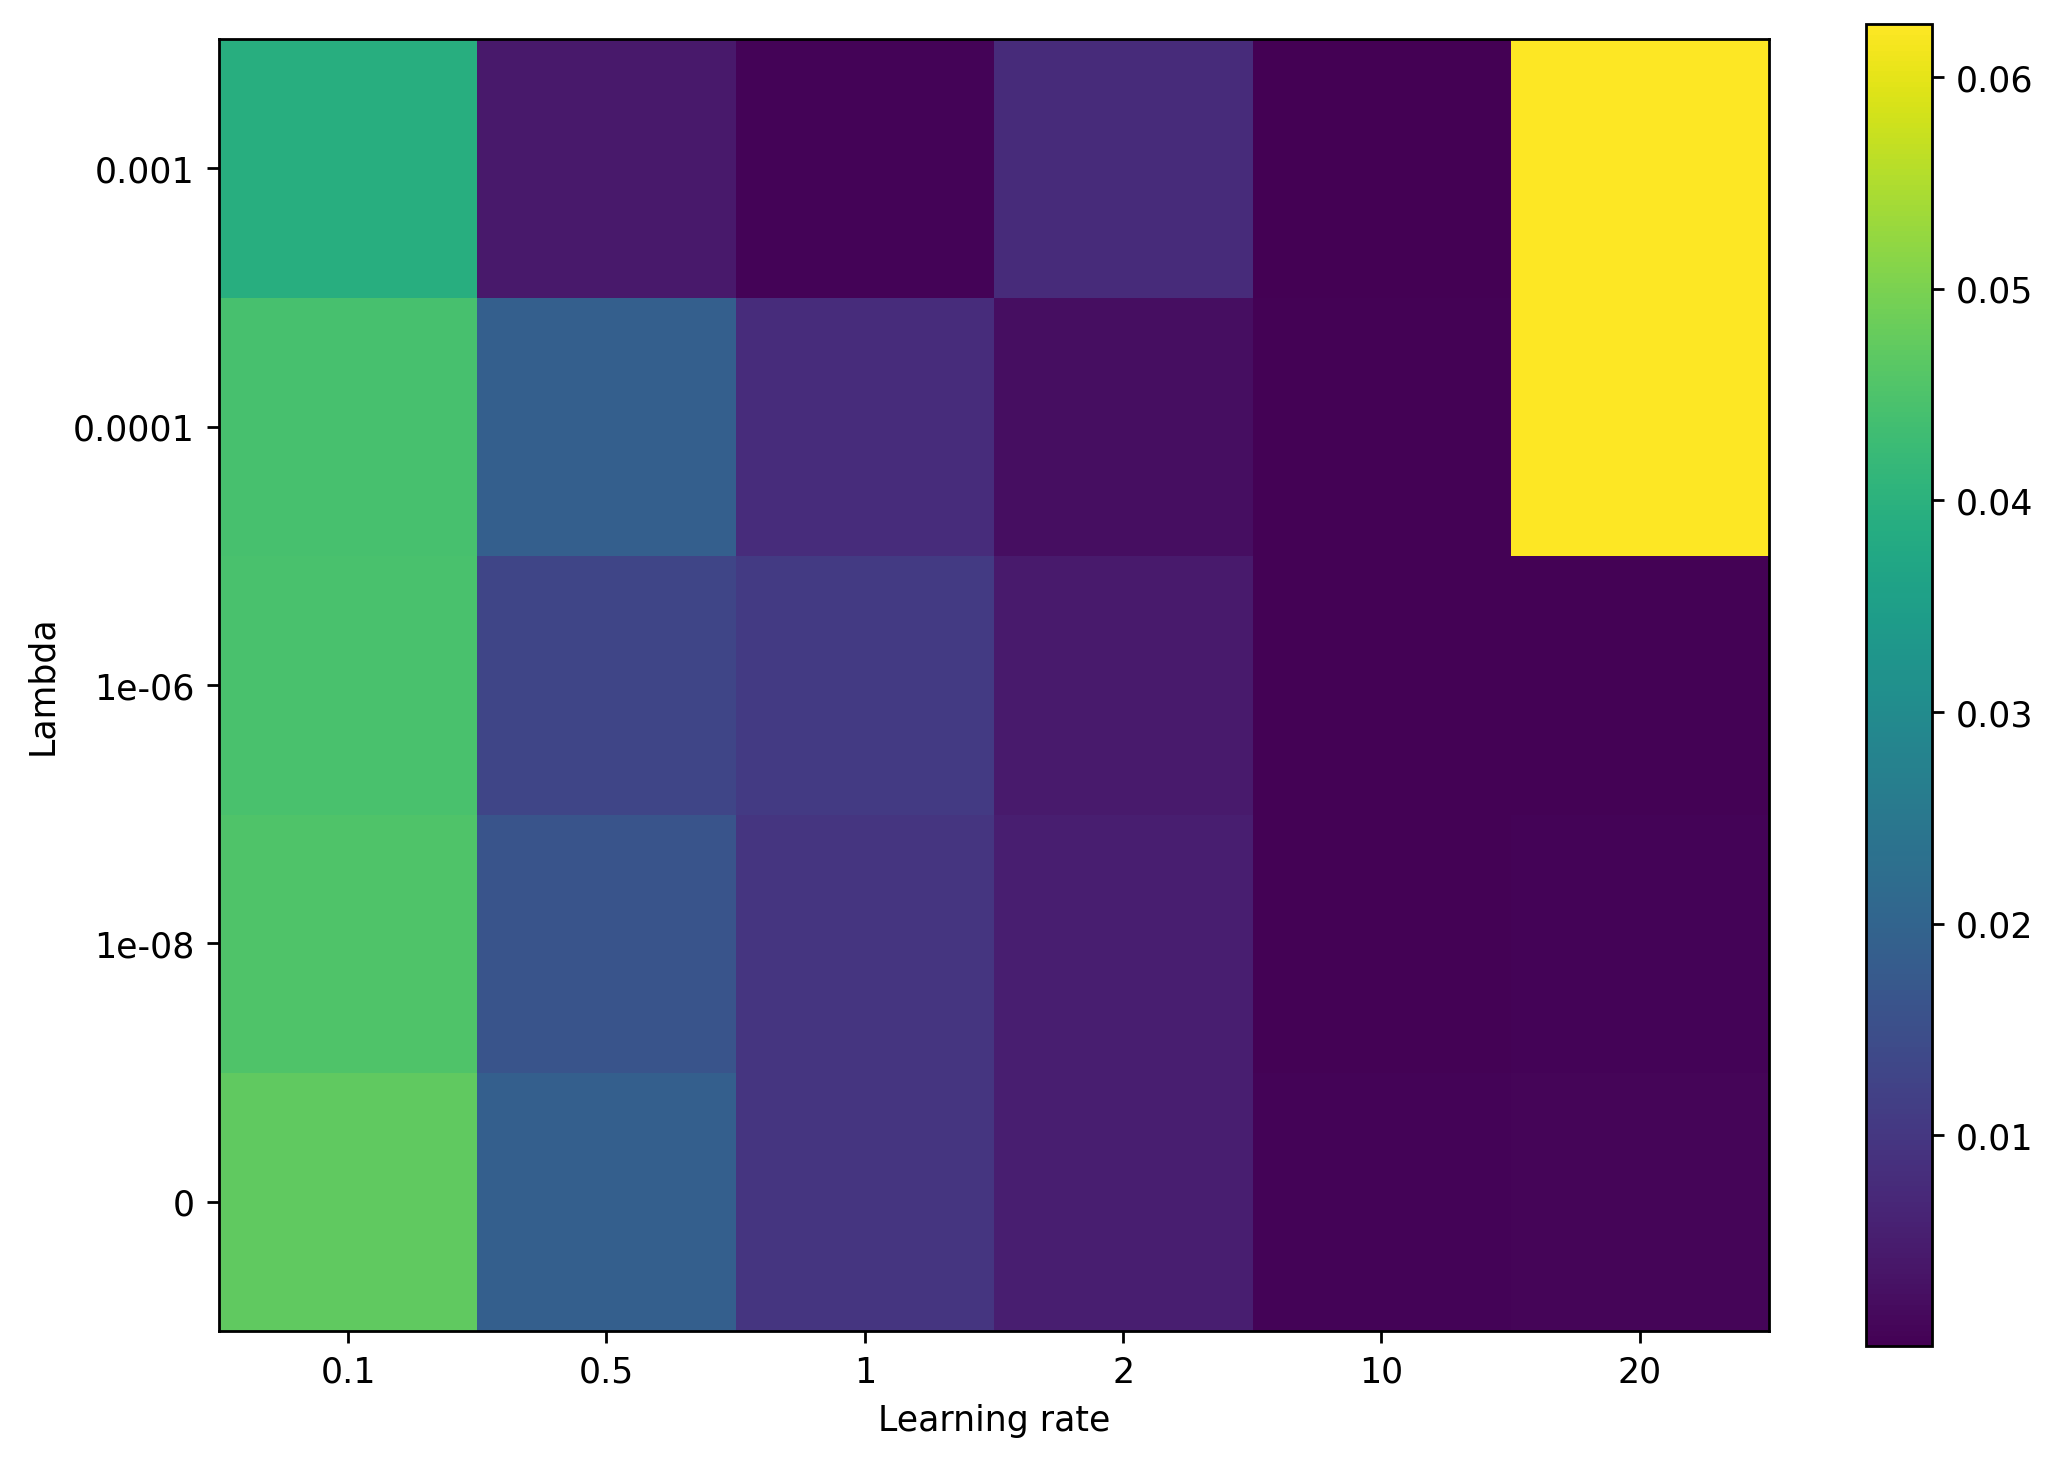

In [14]:
plt.imshow(P, origin='lower')
plt.colorbar()
plt.xticks(range(len(learningRates)), learningRates)
plt.yticks(range(len(regularization)), regularization)
plt.xlabel("Learning rate")
plt.ylabel("Lambda")
plt.show()

# Report

### Implementation

The implementation of the autoencoder is encapsulated in the defined `AutoEncoder` class. It builds a neural nework, which consists of three layers: input, hidden, and output layer. The layer dimensions can be freely chosen. The initialization stage also creates weight matrices initialized to random values samples from a uniform distribution ranging from -0.02 to 0.02.

The `AutoEncoder` class accepts the data batch, learning rate and regularization parameter lambda as input. It stores that variables in class definition to remove repeated passes to its methods. According to its definition, auto encoder also stores the input `X` as a an output `Y`.

The `generate_data` function generates 8 classes of categorical data that is one hot encoded used for training.

The training proces is started by calling the `trainModel()` method that accepts the number of epochs the NN to be trained. Internally, this method creates a loop that calls `updateWeights()` and `feedForward()` methods for a specified bumber of epochs. Additionally, the class stores the computed `costFunction()` internally.

Final predictions are made by `feedForward()` method after the training process.

### Experiments
The learning curves and heat map above present the results of a grid-search performed on the two hyperparameters’ learning rate and lambda value. The Lambda value determines the strength of regularization (weight decay), affecting weight updates executed by the batch gradient descent class. While the learning rate specifies the magnitude of the change in weights performed per iteration.

We can see evidence of divergent behaviour and learning instability when using either a very high learning rate like 20 or giving the regularization term a high weighting of 0.01. The best hyperparameter combination that resulted from this search is a learning rate of 10 with a small lambda approaching 0.

Given enough iterations, the Autoencoder can achieve a cost that is very close to zero. This is not very surprising, since the chosen architecture has 3 hidden units (+1 bias node), each able to separate data linearly and thus able to store perfectly 2 to the power of 3 data points without information loss.